<ipython-input-90-91125aa099ad>:24: FutureWarning: `draw.circle` is deprecated in favor of `draw.disk`.`draw.circle` will be removed in version 0.19
  circle = skimage.draw.circle(590-(row-1)*200, 195+(col-1)*205, radius=90, shape=image.shape[:2])


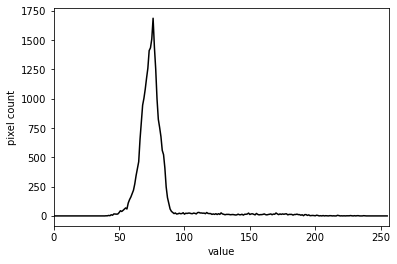

3.32 % filled by bacteria colonies


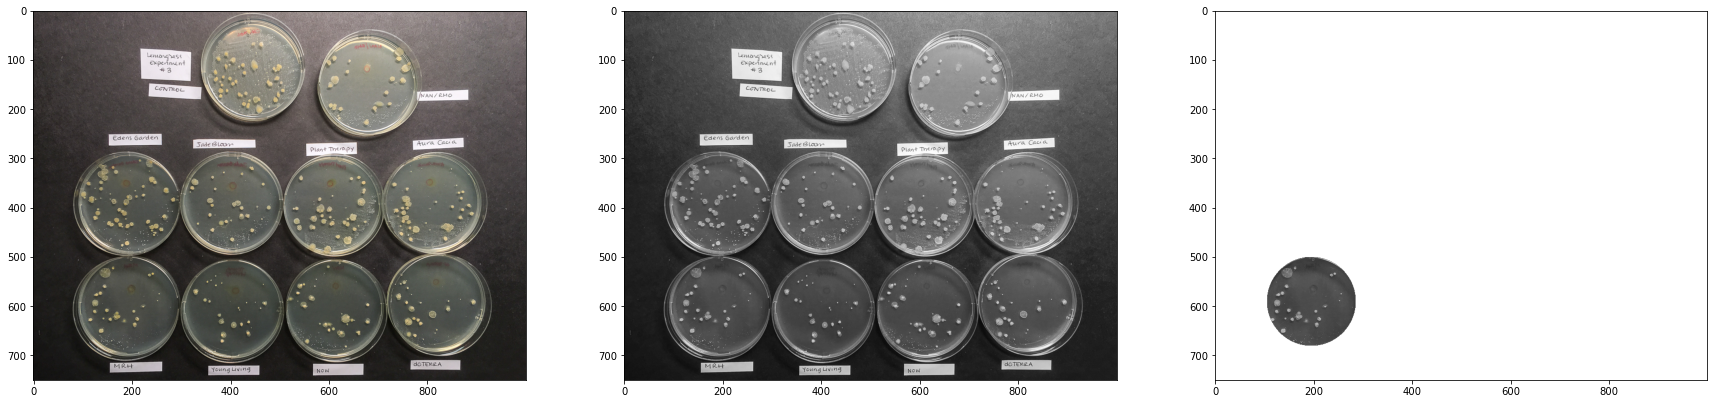

In [90]:
import sys
import skimage.io
import skimage.viewer
import skimage.draw
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import imageio
import scipy.ndimage as ndimage

# open image and indicate petri dish
img_0 = Image.open('results_L3.jpg')
row = 1
col = 1

# making grayscale image and save
img_1 = img_0.convert('LA')
img_1.save('greyscale.png')

# create a circular mask
filename = 'greyscale.png'
image = skimage.io.imread(fname=filename)
mask = np.zeros(shape=image.shape[0:2], dtype="bool")
circle = skimage.draw.circle(590-(row-1)*200, 195+(col-1)*205, radius=90, shape=image.shape[:2])
mask[circle] = 1
masked_img = image[:]
masked_img[np.logical_not(mask)] = 0

# save masked greyscale image
dot = filename.index(".")
binary_file_name = filename[:dot] + "-masked" + filename[dot:]
skimage.io.imsave(fname=binary_file_name, arr=skimage.img_as_ubyte(masked_img))
img_2 = Image.open('greyscale-masked.png')

# create the histogram plot
plt.xlim([0, 256])
histogram, bin_edges = np.histogram(image[:, :, 0][mask], bins=256, range=(0, 256))
plt.plot(histogram, color="k")
plt.xlabel("value")
plt.ylabel("pixel count")
plt.show()

# calculate percentage covered by bacteria 
total = np.sum (histogram)
bacteria = sum(histogram[i] for i in range (110+20*row,200))
print("{:.2f}".format((bacteria/total)*100),"%", "filled by bacteria colonies")

fig, (pic1, pic2, pic3) = plt.subplots(1,3, figsize=(30, 30))
pic1.imshow(img_0, cmap='gray')
pic2.imshow(img_1, cmap='gray')
pic3.imshow(img_2, cmap='gray')